Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.5347
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.3978
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.3282
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.2432
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1847
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1430
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1231
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1032
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0926
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0793
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0722
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0712
Epoch 13/200
40/40 [=================

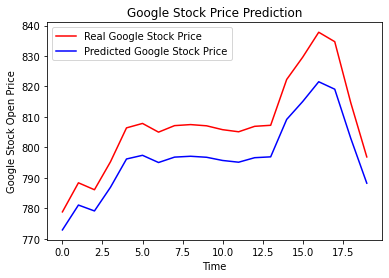

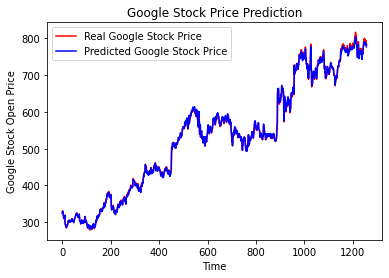

In [1]:
#Recurring Neural Network

#Data Preprocessing

#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import training data set
training_set=pd.read_csv('../input/gooogle-stock-price/Google_Stock_Price_Train.csv')
training_set=training_set.iloc[:,1:2]   #we need a matrix instead of vector for future calculations so[:,1:2] and not [:,1]

#feature scaling (standardization or normalization)
#normalization's result is better
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
training_set=scale.fit_transform(training_set)

#input and output
X_train=training_set[:-1,:]
Y_train=training_set[1:,:]

#reshape to make in format for keras function
X_train = np.reshape(X_train,(1257,1,1))

#Building RNN

#importing packages and libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#initialise RNN
regressor=Sequential()

#add input layer and LSTM layer
#by parameter tuning found that 4 memory units and sigmoid activation is better
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

#add output layer
regressor.add(Dense(units=1))   #output dimension is 1

#compile RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#fitting the RNN
#parameters got by tuning are as below
regressor.fit(x=X_train,y=Y_train,batch_size=32,epochs=200)
#loss=2.6031e-04

#prediction and visulaizing the result
test_set=pd.read_csv('../input/gooogle-stock-price/Google_Stock_Price_Test.csv')
real_stock_price=test_set.iloc[:,1:2]   #we need a matrix instead of vector for future calculations so[:,1:2] and not [:,1]

#prediction
inputs=scale.transform(real_stock_price)

inputs = np.reshape(inputs,(20,1,1))

predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = scale.inverse_transform(predicted_stock_price)

#visualising the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Open Price')
plt.legend()
plt.show()


#predict 2012-2016 stocks
real_stock_price_train = pd.read_csv('../input/gooogle-stock-price/Google_Stock_Price_Train.csv')
real_stock_price_train  = real_stock_price_train .iloc[:,1:2]   #we need a matrix instead of vector for future calculations so[:,1:2] and not [:,1]

predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train  = scale.inverse_transform(predicted_stock_price_train)

#visualising
plt.plot(real_stock_price_train,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price_train,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Open Price')
plt.legend()
plt.show()

#evaluating RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))